In [1011]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1012]:
# IPL ball by ball data from 2008 - 2020 from kaggle. Kept only the data from 2015-2020 onwards and removed rest
df = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")


# "Delhi Capitals" renamed as "Delhi Daredevils" for better team wise analysis
# "Rising Pune Supergiant" renamed as "Rising Pune Supergiants" for better team wise analysis
# Added extra columns for bowler type etc - manually. This results in the warning below
# Removed some columns which I felt were not useful

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Inital DataFrames

In [1013]:
warner_df = df[df.batsman == 'DA Warner']

In [1014]:
virat_df = df[df.batsman == 'V Kohli']

In [1015]:
# Data from 2015 - 2020
# Goals -: 
# Strike Rate Comparison in Power Play, Middle Overs and End
# Runs Scored Comparison against other teams per innings (not average)
# Runs Scored Per IPL edition Comparison 
# Top run getters of IPL between 2015 - 2020
# Strike Rate against best IPL bowlers (Bumrah, ... ??)
# Boundary Percentage in match phase 
# Number of innings in each run bracket (0-10), (11-20) (21-30) ... 
# Comparing Virat's 100 (58) with Warner's 100(55)

In [1016]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

### Strike Rate Comparison in each phase 

In [1022]:
# Warner's Score in each phase of innings
# Overs 0 - 5 - PowerPlay 
# Overs 6 - 15 - Middle Overs
# Overs 16 - 20 - Death Overs

(warner_df[(warner_df.over < 6)].batsman_runs.sum() , 
warner_df[(warner_df.over >= 6) & (warner_df.over < 15)].batsman_runs.sum() , 
warner_df[(warner_df.over >= 15)].batsman_runs.sum() ) 

(1727, 1310, 254)

In [1023]:
warner_sr = (100 * warner_df[(warner_df.over < 6)].batsman_runs.sum() / 
                len (warner_df[(warner_df.over < 6)].batsman_runs), 
                                                                           
             100 *   warner_df[(warner_df.over >= 6) & (warner_df.over < 15)].batsman_runs.sum() / 
                 len(warner_df[(warner_df.over >= 6) & (warner_df.over < 15)].batsman_runs) , 
                                                                           
             100 *    warner_df[(warner_df.over >= 15)].batsman_runs.sum() / 
                 len(warner_df[(warner_df.over >= 15)].batsman_runs))

warner_sr

(138.82636655948554, 139.06581740976645, 180.1418439716312)

In [1020]:
# Virat's SR in each phase of innings
# Overs 0 - 5 - PowerPlay 
# Overs 6 - 15 - Middle Overs
# Overs 16 - 20 - Death Overs

virat_sr = (100 * virat_df[(virat_df.over < 6)].batsman_runs.sum() / 
                len (virat_df[(virat_df.over < 6)].batsman_runs), 
                                                                           
             100 *   virat_df[(virat_df.over >= 6) & (virat_df.over < 15)].batsman_runs.sum() / 
                len(virat_df[(virat_df.over >= 6) & (virat_df.over < 15)].batsman_runs) , 
                                                                           
             100 *    virat_df[(virat_df.over >= 15)].batsman_runs.sum() / 
                len(virat_df[(virat_df.over >= 15)].batsman_runs))

virat_sr

(123.58393408856848, 127.71503040834057, 190.72847682119206)

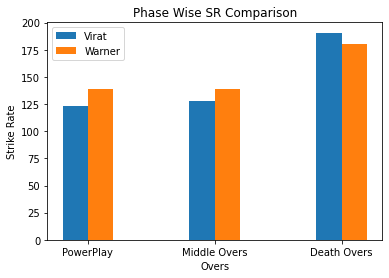

In [1025]:
## Some Visualization 

X = ['PowerPlay','Middle Overs','Death Overs']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, virat_sr, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_sr, 0.2, label = 'Warner')
  
plt.xticks(X_axis, X)
plt.xlabel("Overs")
plt.ylabel("Strike Rate")
plt.title("Phase Wise SR Comparison")
plt.legend()
plt.show()

### Performances against other teams (total runs, runs per innings)

In [1026]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

In [1028]:
# Warner's Total score against each of the teams
warner_score_each_team = warner_df.groupby('bowling_team').batsman_runs.sum()

warner_score_each_team.head()

bowling_team
Chennai Super Kings      258
Delhi Daredevils         372
Gujarat Lions            336
Kings XI Punjab          609
Kolkata Knight Riders    578
Name: batsman_runs, dtype: int64

In [1029]:
# Warner's Total innings against each of the teams 
warner_innings_each_team = warner_df.groupby('bowling_team').id.nunique()

warner_innings_each_team.head()

bowling_team
Chennai Super Kings       6
Delhi Daredevils         11
Gujarat Lions             5
Kings XI Punjab          10
Kolkata Knight Riders    12
Name: id, dtype: int64

In [1030]:
# Warner's RPI against each team 
warner_rpi = (warner_score_each_team / warner_innings_each_team)
warner_rpi.head()

bowling_team
Chennai Super Kings      43.000000
Delhi Daredevils         33.818182
Gujarat Lions            67.200000
Kings XI Punjab          60.900000
Kolkata Knight Riders    48.166667
dtype: float64

In [1031]:
# Virat's Total score against each of the teams
virat_score_each_team = virat_df.groupby('bowling_team').batsman_runs.sum()

virat_score_each_team.head()

bowling_team
Chennai Super Kings      292
Delhi Daredevils         463
Gujarat Lions            283
Kings XI Punjab          388
Kolkata Knight Riders    513
Name: batsman_runs, dtype: int64

In [1032]:
# Virat's Total innings against each of the teams 
virat_innings_each_team = virat_df.groupby('bowling_team').id.nunique()

virat_innings_each_team.head()

bowling_team
Chennai Super Kings       9
Delhi Daredevils         11
Gujarat Lions             5
Kings XI Punjab          11
Kolkata Knight Riders    12
Name: id, dtype: int64

In [1033]:
# Virat's RPI against each team 
virat_rpi = (virat_score_each_team / virat_innings_each_team)
virat_rpi.head()

bowling_team
Chennai Super Kings      32.444444
Delhi Daredevils         42.090909
Gujarat Lions            56.600000
Kings XI Punjab          35.272727
Kolkata Knight Riders    42.750000
dtype: float64

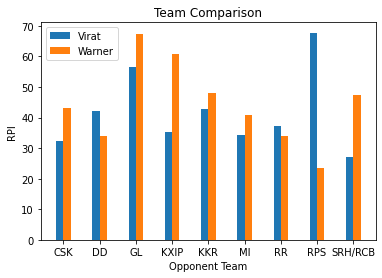

In [1034]:
## Some Visualization 

X = ['CSK','DD','GL','KXIP','KKR','MI', 'RR','RPS','SRH/RCB']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, virat_rpi, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_rpi, 0.2, label = 'Warner')
  
plt.xticks(X_axis, X)
plt.xlabel("Opponent Team")
plt.ylabel("RPI")
plt.title("Team Comparison")
plt.legend()
plt.show()

# Runs Per IPL Edition

In [1035]:
# We don't have date record in the CSV 
# We can rely on id (matching the cricinfo match Id, 
# but that requires some bad coding with MAGIC numbers)
# 829705 - 829823 : 2015 
# 980901 - 981019 : 2016 
# 1082591 - 1082650 : 2017 
# 1136561- 1136620 : 2018 
# 1175356 - 1181768 : 2019 
# 1216492 - 1237181 : 2020

In [1036]:
df.head(1)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,is_wicket,dismissal_kind,player_dismissed,batting_team,bowling_team,Bowler Type,Bowler Speed,Batsman Type
0,829705,2,0,2,G Gambhir,RV Uthappa,SL Malinga,0,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Fast,Left


In [1037]:
# Sample Check for 2015 Warner Runs Scored
warner_df[(warner_df.id >= 829705) & (warner_df.id <= 829823)].batsman_runs.sum() 

562

In [1038]:
# Warner record in each IPL 
# Warner missed the 2018 edition due to ban

warner_total = ( 
    warner_df[(warner_df.id >= 829705) & (warner_df.id <= 829823)].batsman_runs.sum() , 
    warner_df[(warner_df.id >= 980901) & (warner_df.id <= 981019)].batsman_runs.sum() , 
    warner_df[(warner_df.id >= 1082591) & (warner_df.id <= 1082650)].batsman_runs.sum() , 
    warner_df[(warner_df.id >= 1136561) & (warner_df.id <= 1136620)].batsman_runs.sum() , 
    warner_df[(warner_df.id >= 1175356) & (warner_df.id <= 1181768)].batsman_runs.sum() , 
    warner_df[(warner_df.id >= 1216492) & (warner_df.id <= 1237181)].batsman_runs.sum() , 
)

warner_total

(562, 848, 641, 0, 692, 548)

In [1039]:
# Virat record in each IPL 

virat_total = ( 
    virat_df[(virat_df.id >= 829705) & (virat_df.id <= 829823)].batsman_runs.sum() ,
    virat_df[(virat_df.id >= 980901) & (virat_df.id <= 981019)].batsman_runs.sum() , 
    virat_df[(virat_df.id >= 1082591) & (virat_df.id <= 1082650)].batsman_runs.sum() , 
    virat_df[(virat_df.id >= 1136561) & (virat_df.id <= 1136620)].batsman_runs.sum() , 
    virat_df[(virat_df.id >= 1175356) & (virat_df.id <= 1181768)].batsman_runs.sum() , 
    virat_df[(virat_df.id >= 1216492) & (virat_df.id <= 1237181)].batsman_runs.sum() , 
)

virat_total

(505, 973, 308, 530, 464, 466)

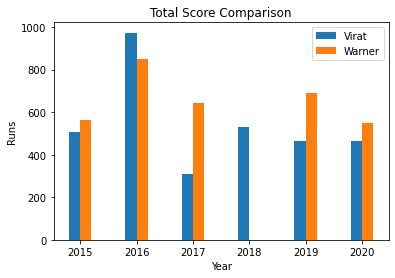

In [1040]:
## Some Visualization 

X = ['2015','2016','2017','2018','2019','2020']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, virat_total, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_total, 0.2, label = 'Warner')
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Runs")
plt.title("Total Score Comparison")
plt.legend()
plt.show()

### Top Total Run Getters in IPL since 2015

In [1041]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

In [1044]:
top_batsmen = df.groupby('batsman').batsman_runs.sum().sort_values(ascending = False).head(10)

top_batsmen.head(4)

batsman
DA Warner         3291
V Kohli           3246
S Dhawan          2969
AB de Villiers    2792
Name: batsman_runs, dtype: int64

<AxesSubplot:ylabel='batsman'>

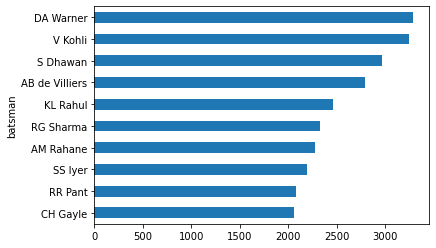

In [1045]:
# Some Visualization 
top_batsmen.iloc[::-1].plot.barh()

### Strike Rate against best bowlers of IPL 

In [1046]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

In [1050]:
# Best Bowler .. Bowlers with most wickets ? 
# Most Wickets 

wickets_without_runouts = df[(df.is_wicket == 1) & (df.dismissal_kind != 'run out') ]

bowler_most_wickets = wickets_without_runouts.groupby('bowler').is_wicket.sum().sort_values(ascending = False).head(10)

bowler_most_wickets

bowler
YS Chahal         109
JJ Bumrah         101
B Kumar            92
Sandeep Sharma     83
Rashid Khan        75
DJ Bravo           74
Imran Tahir        71
MJ McClenaghan     71
UT Yadav           65
CH Morris          65
Name: is_wicket, dtype: int64

In [1051]:
# We need to keep separate lists for Warner and Virat since the top bowlers (Chahal, Bhuvi, Rashid etc) 
# played for the same teams as them

# Considering only Chahal, Bumrah, Bravo, Tahir and McClenaghan for Warner 
# Considering only Bumrah, Bhuvi, Sandeep Sharma, Rashid Khan, Bravo for Virat 
# Including Rabada for both since he has been amazing in the last two years

In [1052]:
warner_sr = ( 100 * warner_df[warner_df.bowler == 'YS Chahal'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'YS Chahal'].batsman_runs.count() , 
                  
              100 *     warner_df[warner_df.bowler == 'JJ Bumrah'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'JJ Bumrah'].batsman_runs.count() , 
             
             100 *     warner_df[warner_df.bowler == 'DJ Bravo'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'DJ Bravo'].batsman_runs.count()  , 
             
             100 *     warner_df[warner_df.bowler == 'Imran Tahir'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'Imran Tahir'].batsman_runs.count() , 
             
             100 *     warner_df[warner_df.bowler == 'MJ McClenaghan'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'MJ McClenaghan'].batsman_runs.count() , 
              
             100 *     warner_df[warner_df.bowler == 'K Rabada'].batsman_runs.sum() 
             / warner_df[warner_df.bowler == 'K Rabada'].batsman_runs.count()
            )

warner_sr

(207.69230769230768,
 122.58064516129032,
 100.0,
 190.47619047619048,
 157.57575757575756,
 162.85714285714286)

In [1053]:
virat_sr = ( 100 * virat_df[virat_df.bowler == 'JJ Bumrah'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'JJ Bumrah'].batsman_runs.count() , 
                  
              100 *     virat_df[virat_df.bowler == 'B Kumar'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'B Kumar'].batsman_runs.count() , 
             
             100 *     virat_df[virat_df.bowler == 'Sandeep Sharma'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'Sandeep Sharma'].batsman_runs.count()  , 
             
             100 *     virat_df[virat_df.bowler == 'Rashid Khan'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'Rashid Khan'].batsman_runs.count() , 
             
             100 *     virat_df[virat_df.bowler == 'Imran Tahir'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'Imran Tahir'].batsman_runs.count() , 
            
             100 *     virat_df[virat_df.bowler == 'K Rabada'].batsman_runs.sum() 
             / virat_df[virat_df.bowler == 'K Rabada'].batsman_runs.count()
            )

virat_sr

(146.3768115942029,
 135.13513513513513,
 122.91666666666667,
 94.73684210526316,
 132.0,
 95.23809523809524)

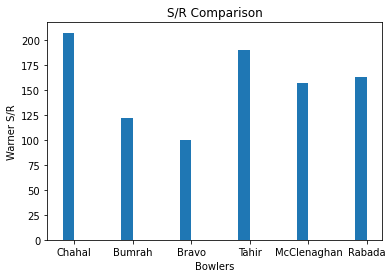

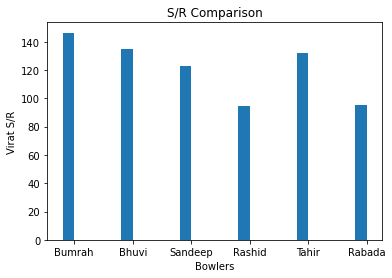

In [1054]:
# Some Visualization 
# This cannot be a exact comparative chart, since the bowlers are not all the same

warner_X = ['Chahal','Bumrah','Bravo','Tahir','McClenaghan', 'Rabada']
warner_X_axis = np.arange(len(warner_X))


plt.bar(warner_X_axis - 0.1, warner_sr, 0.2)
  
plt.xticks(warner_X_axis, warner_X)
plt.xlabel("Bowlers")
plt.ylabel("Warner S/R")
plt.title("S/R Comparison")
plt.show()

virat_X = ['Bumrah','Bhuvi','Sandeep','Rashid','Tahir', 'Rabada']
virat_X_axis = np.arange(len(virat_X))
  
plt.bar(virat_X_axis - 0.1, virat_sr, 0.2)
  
plt.xticks(virat_X_axis, virat_X)
plt.xlabel("Bowlers")
plt.ylabel("Virat S/R")
plt.title("S/R Comparison")
plt.show()

### Boundary and Dot Ball Percentage in each match phase

In [1055]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

In [1056]:
# Warner Boundary Balls in first 6 overs
warner_df[(warner_df.over < 6) & ((warner_df.batsman_runs == 4) | (warner_df.batsman_runs == 6))].ball.count() 

268

In [1057]:
# Warner Total Balls faced in first 6 overs
warner_df[(warner_df.over < 6)].ball.count() 

1244

In [1058]:
warner_boundary_percentages = (
    100 * warner_df[(warner_df.over < 6) & ((warner_df.batsman_runs == 4) | (warner_df.batsman_runs == 6))].ball.count() / 
                warner_df[(warner_df.over < 6)].ball.count() , 
    
    100 * warner_df[(warner_df.over >= 6) & (warner_df.over < 15) & ((warner_df.batsman_runs == 4) | (warner_df.batsman_runs == 6))].ball.count() / 
                warner_df[(warner_df.over >= 6) & (warner_df.over < 15)].ball.count(), 
    
    100 * warner_df[(warner_df.over >= 15) & ((warner_df.batsman_runs == 4) | (warner_df.batsman_runs == 6))].ball.count() / 
                warner_df[(warner_df.over >= 15)].ball.count()
)

warner_boundary_percentages

(21.543408360128616, 14.225053078556263, 25.53191489361702)

In [1059]:
virat_boundary_percentages = (
    100 * virat_df[(virat_df.over < 6) & ((virat_df.batsman_runs == 4) | (virat_df.batsman_runs == 6))].ball.count() / 
                virat_df[(virat_df.over < 6)].ball.count() , 
    
    100 * virat_df[(virat_df.over >= 6) & (virat_df.over < 15) & ((virat_df.batsman_runs == 4) | (virat_df.batsman_runs == 6))].ball.count() / 
                virat_df[(virat_df.over >= 6) & (virat_df.over < 15)].ball.count(), 
    
    100 * virat_df[(virat_df.over >= 15) & ((virat_df.batsman_runs == 4) | (virat_df.batsman_runs == 6))].ball.count() / 
                virat_df[(virat_df.over >= 15)].ball.count()
)

virat_boundary_percentages

(17.30175077239959, 11.815812337098176, 24.172185430463575)

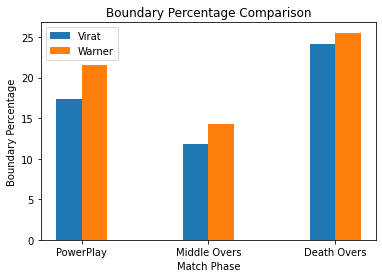

In [1060]:
# Some Visualizations 

X = ['PowerPlay' , 'Middle Overs' , 'Death Overs']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, virat_boundary_percentages, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_boundary_percentages, 0.2, label = 'Warner')
  
plt.xticks(X_axis, X)
plt.xlabel("Match Phase")
plt.ylabel("Boundary Percentage")
plt.title("Boundary Percentage Comparison")
plt.legend()
plt.show()

In [1061]:
warner_dotball_percentages = (
    100 * warner_df[(warner_df.over < 6) & (warner_df.batsman_runs == 0)].ball.count() / 
                warner_df[(warner_df.over < 6)].ball.count() , 
    
    100 * warner_df[(warner_df.over >= 6) & (warner_df.over < 15) & (warner_df.batsman_runs == 0)].ball.count() / 
                warner_df[(warner_df.over >= 6) & (warner_df.over < 15)].ball.count(), 
    
    100 * warner_df[(warner_df.over >= 15) & (warner_df.batsman_runs == 0)].ball.count() / 
                warner_df[(warner_df.over >= 15)].ball.count()
)

warner_dotball_percentages

(43.0064308681672, 26.53927813163482, 26.24113475177305)

In [1063]:
virat_dotball_percentages = (
    100 * virat_df[(virat_df.over < 6) & (virat_df.batsman_runs == 0)].ball.count() / 
                virat_df[(virat_df.over < 6)].ball.count() , 
    
    100 * virat_df[(virat_df.over >= 6) & (virat_df.over < 15) & (virat_df.batsman_runs == 0)].ball.count() / 
                virat_df[(virat_df.over >= 6) & (virat_df.over < 15)].ball.count(), 
    
    100 * virat_df[(virat_df.over >= 15) & (virat_df.batsman_runs == 0)].ball.count() / 
                virat_df[(virat_df.over >= 15)].ball.count()
)

virat_dotball_percentages

(40.988671472708546, 25.89052997393571, 22.8476821192053)

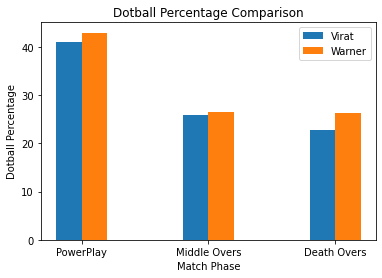

In [1064]:
# Some Visualizations 

X = ['PowerPlay' , 'Middle Overs' , 'Death Overs']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, virat_dotball_percentages, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_dotball_percentages, 0.2, label = 'Warner')
  
plt.xticks(X_axis, X)
plt.xlabel("Match Phase")
plt.ylabel("Dotball Percentage")
plt.title("Dotball Percentage Comparison")
plt.legend()
plt.show()

### Scores in each bracket (0-10) (11-20) ... 

In [1065]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'is_wicket', 'dismissal_kind', 'player_dismissed',
       'batting_team', 'bowling_team', 'Bowler Type', 'Bowler Speed',
       'Batsman Type'],
      dtype='object')

In [1067]:
warner_innings = warner_df.groupby('id').batsman_runs.sum()

warner_innings.head()

id
829711    53
829719    57
829727    21
829731    28
829743    91
Name: batsman_runs, dtype: int64

In [892]:
warner_score_dist = ( 
    warner_innings[warner_innings.values <= 10].count() , 
    warner_innings[(warner_innings.values > 10) & ((warner_innings.values <= 20))].count() , 
    warner_innings[(warner_innings.values > 20) & ((warner_innings.values <= 30))].count() , 
    warner_innings[(warner_innings.values > 30) & ((warner_innings.values <= 40))].count() , 
    warner_innings[(warner_innings.values > 40) & ((warner_innings.values <= 50))].count() , 
    warner_innings[(warner_innings.values > 50) & ((warner_innings.values <= 60))].count() , 
    warner_innings[(warner_innings.values > 60) & ((warner_innings.values <= 70))].count() , 
    warner_innings[(warner_innings.values > 70) & ((warner_innings.values <= 80))].count() , 
    warner_innings[(warner_innings.values > 80) & ((warner_innings.values <= 90))].count() , 
    warner_innings[(warner_innings.values > 90) & ((warner_innings.values <= 99))].count() , 
    warner_innings[warner_innings.values >= 100].count() )

warner_score_dist

(12, 7, 8, 5, 8, 12, 8, 3, 5, 3, 2)

In [1068]:
virat_innings  = virat_df.groupby('id').batsman_runs.sum()

virat_innings.head()

id
829713    13
829719    41
829737    18
829745    51
829749    62
Name: batsman_runs, dtype: int64

In [1069]:
virat_score_dist = ( 
    virat_innings[virat_innings.values <= 10].count() , 
    virat_innings[(virat_innings.values > 10) & ((virat_innings.values <= 20))].count() , 
    virat_innings[(virat_innings.values > 20) & ((virat_innings.values <= 30))].count() , 
    virat_innings[(virat_innings.values > 30) & ((virat_innings.values <= 40))].count() , 
    virat_innings[(virat_innings.values > 40) & ((virat_innings.values <= 50))].count() , 
    virat_innings[(virat_innings.values > 50) & ((virat_innings.values <= 60))].count() , 
    virat_innings[(virat_innings.values > 60) & ((virat_innings.values <= 70))].count() , 
    virat_innings[(virat_innings.values > 70) & ((virat_innings.values <= 80))].count() , 
    virat_innings[(virat_innings.values > 80) & ((virat_innings.values <= 90))].count() , 
    virat_innings[(virat_innings.values > 90) & ((virat_innings.values <= 99))].count() , 
    virat_innings[virat_scores.values >= 100].count() )

virat_score_dist

(19, 14, 7, 8, 10, 7, 6, 5, 3, 1, 5)

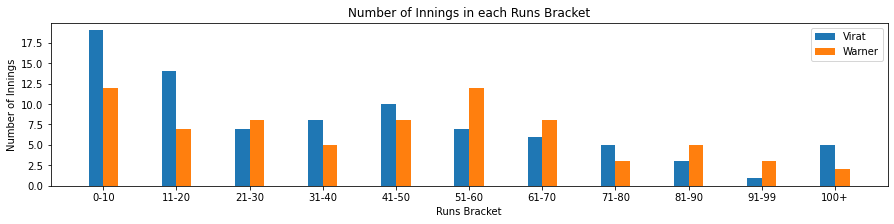

In [1070]:
# Some Visualizations 

X = ['0-10' , '11-20' , '21-30' ,'31-40' ,'41-50' ,'51-60' ,'61-70' ,'71-80' ,'81-90' ,'91-99' , '100+']
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 3))

plt.bar(X_axis - 0.1, virat_score_dist, 0.2, label = 'Virat')
plt.bar(X_axis + 0.1, warner_score_dist, 0.2, label = 'Warner')


plt.xticks(X_axis, X)
plt.xlabel("Runs Bracket")
plt.ylabel("Number of Innings")
plt.title("Number of Innings in each Runs Bracket")
plt.legend()
plt.show()

### Comparing Virat's 100 (58) with Warner's 100(55) 

In [1071]:
# Match Id - 1175366 
# SRH vs RCB (https://www.espncricinfo.com/series/ipl-2019-1165643/
# sunrisers-hyderabad-vs-royal-challengers-bangalore-11th-match-1175366/full-scorecard)
# Warner 100(55)

# Match Id 1178410 
# RCB vs KKR (https://www.espncricinfo.com/series/ipl-2019-1165643/
# kolkata-knight-riders-vs-royal-challengers-bangalore-35th-match-1178410/full-scorecard)
# Virat - 100(58)

# Comparing the scores two batsmen during the same points in their innings

In [1072]:
# warner_srs = ( 100 * warner_df[warner_df.id == 1175366].batsman_runs.cumsum() /
#              warner_df[warner_df.id == 1175366].batsman_runs.expanding().count())

warner_srs = warner_df[warner_df.id == 1175366].batsman_runs.cumsum() 
              
(warner_srs.values)

array([  4,   5,   6,   7,   8,   8,  14,  15,  19,  25,  27,  29,  30,
        32,  33,  37,  37,  43,  43,  43,  44,  46,  46,  48,  50,  54,
        55,  56,  57,  58,  59,  60,  61,  63,  64,  66,  66,  67,  68,
        69,  70,  72,  73,  79,  81,  81,  83,  84,  86,  92,  94,  95,
        96,  96, 100], dtype=int64)

In [1073]:
# virat_srs = ( 100 * virat_df[virat_df.id == 1178410].batsman_runs.cumsum() / 
#              virat_df[virat_df.id == 1178410].batsman_runs.expanding().count() )

virat_srs = virat_df[virat_df.id == 1178410].batsman_runs.cumsum() 
             
virat_srs.values

array([  1,   3,   3,   4,   5,   6,  10,  11,  13,  13,  13,  13,  17,
        18,  19,  23,  23,  24,  26,  26,  27,  31,  31,  35,  36,  36,
        37,  38,  39,  41,  41,  41,  47,  48,  49,  50,  51,  52,  53,
        54,  58,  59,  63,  65,  69,  75,  76,  77,  83,  84,  86,  92,
        96,  98,  99, 100, 100, 100], dtype=int64)

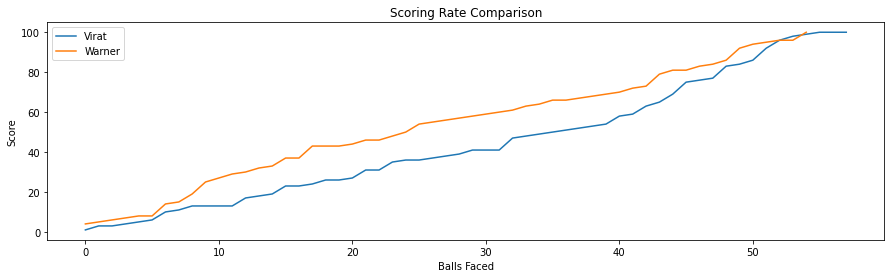

In [1074]:
# Some Visualizations 

plt.figure(figsize=(15, 4))
plt.plot(virat_srs.values,label='Virat')
plt.plot(warner_srs.values, label='Warner')
plt.xlabel("Balls Faced")
plt.ylabel("Score")

plt.title("Scoring Rate Comparison")
plt.legend()
plt.show()

### Fin.

In [1075]:
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,is_wicket,dismissal_kind,player_dismissed,batting_team,bowling_team,Bowler Type,Bowler Speed,Batsman Type
0,829705,2,0,2,G Gambhir,RV Uthappa,SL Malinga,0,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Fast,Left
1,829705,2,0,1,RV Uthappa,G Gambhir,SL Malinga,1,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Fast,NaN
2,829705,2,0,6,RV Uthappa,G Gambhir,SL Malinga,0,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Fast,NaN
3,829705,2,0,7,RV Uthappa,G Gambhir,SL Malinga,0,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Fast,NaN
4,829705,2,1,1,G Gambhir,RV Uthappa,R Vinay Kumar,0,0,NaN,NaN,Kolkata Knight Riders,Mumbai Indians,Right arm pace,Medium,NaN


In [1076]:
df.inning.unique()

array([2, 1], dtype=int64)